In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input,Dense,Dropout,BatchNormalization
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df_thyroid = pd.read_csv('/content/drive/MyDrive/datascience/thyroidDF.csv')

In [ ]:
df_thyroid


In [ ]:
df_thyroid.shape

(9172, 31)

In [ ]:
# checking data frame in deep
df_thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
#implementing missing matrix
import missingno as msnum
# visualizing missing matrix
msnum.matrix(df_thyroid)

In [ ]:
df_thyroid1 = df_thyroid.copy()

In [ ]:
df_thyroid1.shape

(9172, 31)

In [ ]:
df_thyroid.info()

In [ ]:
df_thyroid1.isna().sum()

In [ ]:
# check and remove null values
df_thyroid1.isnull().sum()

In [ ]:
# fill up the Null or missing values values
df_thyroid1['TSH'] = df_thyroid1['TSH'].fillna(df_thyroid1['TSH'].mean())

In [ ]:
df_thyroid1['TSH'].isna().sum()

In [ ]:
df_thyroid1['T3'] = df_thyroid1['T3'].fillna(df_thyroid1['T3'].mean())

In [ ]:
df_thyroid1['T3'].isna().sum()

0

In [ ]:
df_thyroid1['T4U'] = df_thyroid1['T4U'].fillna(df_thyroid1['T4U'].mean())

In [ ]:
df_thyroid1['TSH'].isna().sum()

In [ ]:
df_thyroid1['FTI'] = df_thyroid1['FTI'].fillna(df_thyroid1['FTI'].mean())

In [ ]:
df_thyroid1['FTI'].isna().sum()

0

In [ ]:
df_thyroid1['TT4'] = df_thyroid1['TT4'].fillna(df_thyroid1['TT4'].mean())

In [ ]:
df_thyroid1['TT4'].isna().sum()

0

In [ ]:
cols = ['age','sex','TBG']

In [ ]:
df_thyroid1 = df_thyroid1.drop(cols,axis=1)

In [ ]:
df_thyroid1.shape

(9172, 28)

In [ ]:
# rechecking for Null values
df_thyroid1.isnull().sum()

on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
referral_source        0
target                 0
patient_id             0
dtype: int64

<Axes: >

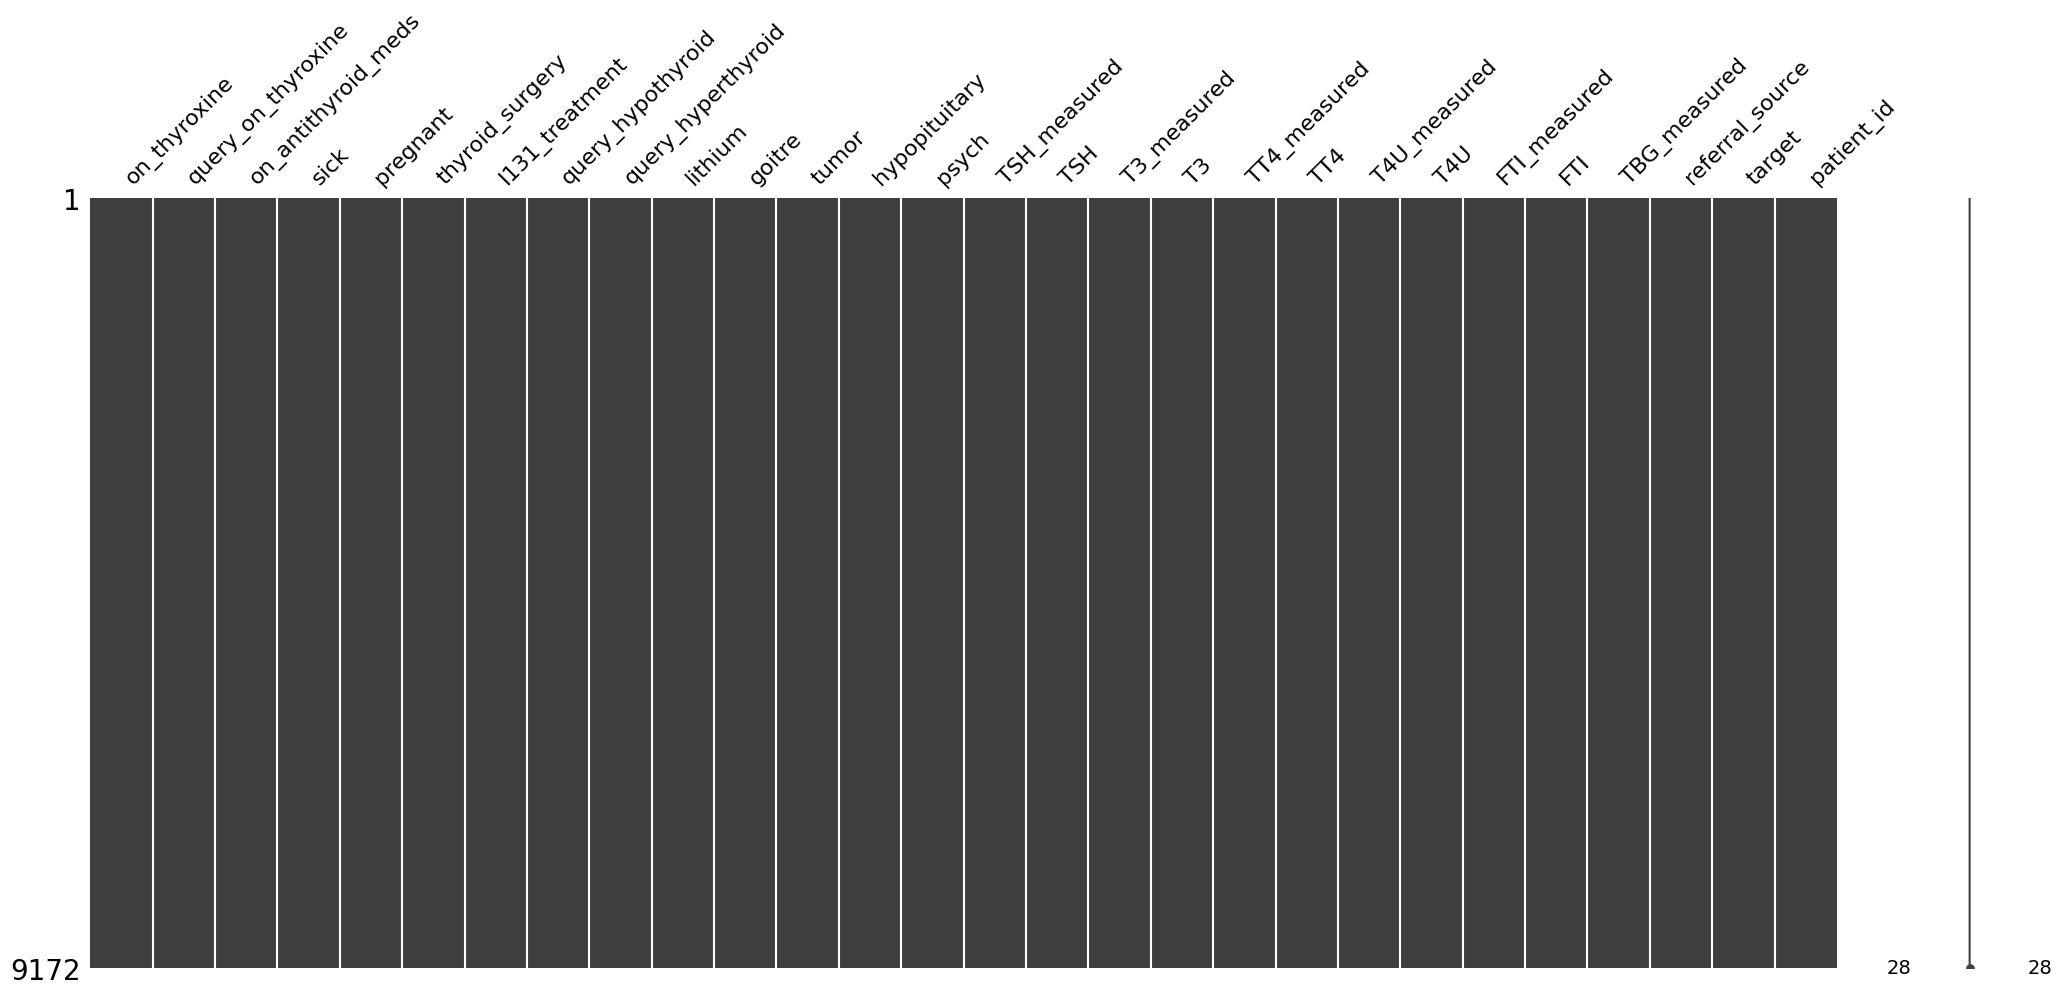

In [ ]:
msnum.matrix(df_thyroid1)

In [ ]:
cols_name = df_thyroid1.columns

In [ ]:
col_cat = []
col_cont = []

In [ ]:
# next step is Data Preprocessing
# in this we deal with missing values and also some time follow divide and conquer techniques
for col in cols_name:
  if df_thyroid1[col].dtype == 'object':
    col_cat.append(col)
  else:
    col_cont.append(col)


In [ ]:
# remove patient ID value
print(col_cont)

['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'patient_id']


In [ ]:
df_cont = df_thyroid1[col_cont]

In [ ]:
# we need to Normalize the data
df_cont.info()
# we don't need patient id
df_cont = df_cont.drop('patient_id', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TSH         9172 non-null   float64
 1   T3          9172 non-null   float64
 2   TT4         9172 non-null   float64
 3   T4U         9172 non-null   float64
 4   FTI         9172 non-null   float64
 5   patient_id  9172 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 430.1 KB


In [ ]:
col_cont = df_cont.columns

In [ ]:
len(col_cont)

5

In [ ]:
# we will use Standard Scaler for normalization
sc = StandardScaler()
x_values = sc.fit_transform(df_cont)

In [ ]:
col_cont

Index(['TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

In [ ]:
# correlation
print(df_thyroid1[col_cont].corr())

          TSH        T3       TT4       T4U       FTI
TSH  1.000000 -0.136613 -0.264755  0.072962 -0.257900
T3  -0.136613  1.000000  0.471792  0.281336  0.312401
TT4 -0.264755  0.471792  1.000000  0.362280  0.738279
T4U  0.072962  0.281336  0.362280  1.000000 -0.238927
FTI -0.257900  0.312401  0.738279 -0.238927  1.000000


In [ ]:
# since there are a number of features which seems to be mutually correlated so we go for another metric
# this metric is known as Variace Inflation Factor(VIF)
# this factor determine the importance to one variable with all other and give a consolidated value
# if the value is less than 5 it seems very good.
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df_thyroid1[col_cont]
vif_data = pd.DataFrame()
vif_data["feature"] = col_cont
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,TSH,1.182305
1,T3,10.418246
2,TT4,37.757750
3,T4U,15.675048
4,FTI,19.943355


In [ ]:
y = df_thyroid1['target'].value_counts()

In [ ]:
df_thyroid1['target'].isnull().sum()

0

In [ ]:
print(y)

-      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64


In [ ]:
y = df_thyroid1['target'].map({'A':0,'B':0,'C':0,'D':0,'E':1,'F':1,'G':1,'H':1,'I':2,'J':2,'K':3,'L':4,'M':4,'N':4,'O':5,'P':5,'Q':5,
                               'D|R':6,'OI':6,'GKJ':6,'LJ':6,'MI':6,'FK':6,'H|K':6,'GI':6,'KJ':6,'C|I':6,'MK':6,'AK':6,'GK':6,'S':6,'T':6,'-':7})

In [ ]:
y = y.fillna(y.median())

In [ ]:
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder
lb = LabelBinarizer()
y_lbl = lb.fit_transform(y)

In [ ]:
a = np.array([1,2,3,4])
a_lb = lb.fit_transform(a)

In [ ]:
a_lb

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x_values,y_lbl,test_size = 0.3)

In [ ]:
def my_relu(x):
  return tf.abs(x)

In [ ]:
# implement neural network
inp = len(df_cont.columns)
layer1  = Input(shape = (inp,))
hidden1 = Dense(128,activation = my_relu)(layer1)
hidden2 = Dropout(0.2)(hidden1)
hidden3 = Dense(64, activation = my_relu)(hidden2)
hidden4 = Dropout(0.2)(hidden3)
output =  Dense(8,activation='softmax')(hidden4)

mdl_thyro = Model(inputs=layer1,outputs=output)


In [ ]:
# printing the model
mdl_thyro.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 128)               768       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 9544 (37.28 KB)
Trainable params: 9544 (37.28 K

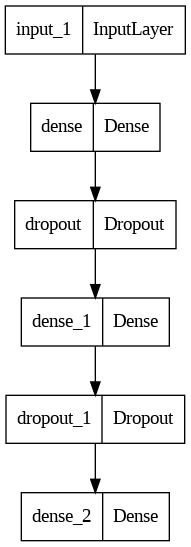

In [ ]:
keras.utils.plot_model(mdl_thyro,'model.png')

In [ ]:
# let us now fit the model with data
# first compile the model
mdl_thyro.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

mdl

In [ ]:
history = mdl_thyro.fit(train_x,train_y,epochs=100,verbose=1)

Epoch 1/100
201/201 [==============================] - 2s 4ms/step - loss: 1.1593 - accuracy: 0.7701
Epoch 2/100
201/201 [==============================] - 1s 3ms/step - loss: 0.6489 - accuracy: 0.8182
Epoch 3/100
201/201 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.8273
Epoch 4/100
201/201 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.8335
Epoch 5/100
201/201 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.8391
Epoch 6/100
201/201 [==============================] - 1s 4ms/step - loss: 0.4925 - accuracy: 0.8442
Epoch 7/100
201/201 [==============================] - 1s 5ms/step - loss: 0.4775 - accuracy: 0.8509
Epoch 8/100
201/201 [==============================] - 1s 7ms/step - loss: 0.4738 - accuracy: 0.8480
Epoch 9/100
201/201 [==============================] - 1s 5ms/step - loss: 0.4569 - accuracy: 0.8512
Epoch 10/100
201/201 [==============================] - 1s 3ms/step - loss: 0.4478 - accura

A important point to remember
1. if your true labels are one label binarize then use categorical cross entropy
2. if your true labels are one hot encoded ie ['a','b'] = [0,1] then use sparse categorical entropy


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


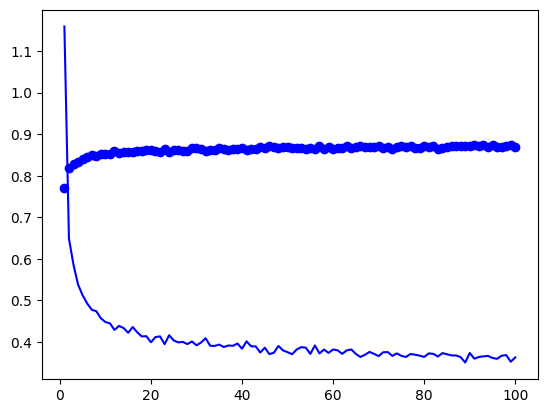

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,'bo',label = 'Training Accuracy')
plt.plot(epochs,loss,'b',label = 'Validation_loss')

In [ ]:
# Implemtation of chisquare for categorical variable analysis
# we will manually create the table of chisquare
df_cat = df_thyroid1[col_cat]


df_chisquare = pd.DataFrame(data = [ (0 for i in range(len(df_cat.columns))) for j in range(len(df_cat.columns))],
                            columns = list(df_cat[col_cat].columns),index = list(df_cat.columns))

In [ ]:
df_chisquare

In [ ]:
# inserting p-value in the data frame to check the statistical significance among variables
# import package for chi square
# in Chisquare estimation there are two important ways
# p- value method if p-value < 0.05 Null Hypothesis rejected
# p-value greater than 0.05 Null Hypothesis accepted
# H0 : pair of categorical variables are uncorrelated
# H1 : pair of categorical variables are correlated
# degree of freedom is (c-1)
# here we will count columns in Contigency table
# p-value determine the probabiliy of occuring of chi square value which has occured
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

for i in list(df_cat.columns):
  for j in list(df_cat.columns):
    if i!=j:
      # contigency table
      cnt_table_ind = pd.crosstab(df_cat[i],df_cat[j])

      chi2_stat, p, dof, expected  = chi2_contingency(cnt_table_ind)
      print(" Chi2 calculation between {0} and {1}".format(i,j))
      print(f"chi2 statistic:     {chi2_stat:.5g}")
      print(f"p-value:            {p:.5g}")
      print(f"degrees of freedom: {dof}")
      #print("expected frequencies:\n",expected)

      df_chisquare.loc[i,j] = format(p)


 Chi2 calculation between on_thyroxine and query_on_thyroxine
chi2 statistic:     0.4506
p-value:            0.50205
degrees of freedom: 1
 Chi2 calculation between on_thyroxine and on_antithyroid_meds
chi2 statistic:     0.75637
p-value:            0.38447
degrees of freedom: 1
 Chi2 calculation between on_thyroxine and sick
chi2 statistic:     20.262
p-value:            6.7511e-06
degrees of freedom: 1
 Chi2 calculation between on_thyroxine and pregnant
chi2 statistic:     0.74462
p-value:            0.38819
degrees of freedom: 1
 Chi2 calculation between on_thyroxine and thyroid_surgery
chi2 statistic:     2.6399
p-value:            0.10421
degrees of freedom: 1
 Chi2 calculation between on_thyroxine and I131_treatment
chi2 statistic:     45.334
p-value:            1.6611e-11
degrees of freedom: 1
 Chi2 calculation between on_thyroxine and query_hypothyroid
chi2 statistic:     113.73
p-value:            1.4918e-26
degrees of freedom: 1
 Chi2 calculation between on_thyroxine and quer

In [ ]:
df_chisquare

,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,target
on_thyroxine,0,0.502050947286645,0.3844673814176466,6.7511444503381454e-06,0.38818505216605304,0.10420684132642716,1.66107307007736e-11,1.4918286424814468e-26,0.0035579127778648974,0.7436081091222392,...,0.6348688834919702,7.685161823996176e-10,0.00018637082278937292,1.7948106259823385e-15,0.0038747561433559595,7.174926442436124e-05,0.00010286808708399142,0.004766203891885701,3.1651568840956088e-114,0.0
query_on_thyroxine,0.502050947286645,0,0.295116126095287,0.5951610808929045,0.19283781774596342,0.8572518656211889,0.15975034736054697,0.19624197920116304,0.007952528124161067,0.39223212628895654,...,5.572868521521545e-16,0.011397240842487128,2.599186212866452e-44,6.7386216568529425e-09,0.00888609441527063,0.0015726664151669409,0.0016914122263855726,0.02334164926946033,6.739857388362676e-09,0.02906087848339539
on_antithyroid_meds,0.3844673814176466,0.295116126095287,0,0.05825942050438159,0.06174536164442452,0.8794670455592066,0.8010771436393566,0.016872963245375208,1.2002187959263566e-21,0.5282525878377347,...,1.0,0.0319921876545241,0.48679642135936607,0.0003029387585782651,0.9686581274143761,0.9295239232641217,0.9060070193259269,1.0,4.73419432756755e-13,1.0466901960990686e-134
sick,6.7511444503381454e-06,0.5951610808929045,0.05825942050438159,0,0.07217133133543409,0.48465485738804603,0.017039444650946454,0.6842513720399879,0.010764673575721322,0.5878306035364156,...,1.0,0.003226358966777855,0.557782627973673,0.6117682341669126,1.0,0.581817048796148,0.6157926900994006,0.9061108999427901,6.180185441443223e-138,2.7780757495244036e-05
pregnant,0.38818505216605304,0.19283781774596342,0.06174536164442452,0.07217133133543409,0,0.959126141970482,0.28731219325764706,0.06224636418533998,1.709460960447176e-09,0.570197338816377,...,1.0,0.2678597700539018,1.0,0.40294181669963525,0.4520145245656262,0.0417462322572685,0.043806231507910236,0.7714831716428026,1.3920056075639938e-251,1.9657634116301553e-248
thyroid_surgery,0.10420684132642716,0.8572518656211889,0.8794670455592066,0.48465485738804603,0.959126141970482,0,0.9840141467753548,1.0,0.09087392492055303,0.45571944845631074,...,1.0,0.019306302756237313,0.08038268804568982,1.0,0.2294638072022515,0.47665107045640775,0.49461115766224795,0.7853404980779877,0.000178929790782996,1.5499586265743945e-187
I131_treatment,1.66107307007736e-11,0.15975034736054697,0.8010771436393566,0.017039444650946454,0.28731219325764706,0.9840141467753548,0,1.0691369658329707e-06,4.439417505944414e-05,0.34695010641951407,...,1.0,0.007337666806343876,0.0012353344549009457,0.5489693524322886,0.09225398299287374,0.22767294070677108,0.23972661459460454,0.11068692461959963,7.93051313093138e-22,5.154613946919516e-45
query_hypothyroid,1.4918286424814468e-26,0.19624197920116304,0.016872963245375208,0.6842513720399879,0.06224636418533998,1.0,1.0691369658329707e-06,0,0.15785841831402972,0.436580141588502,...,1.0,0.000656886411161754,0.001406275599913845,0.07216259083187944,0.5814506538908386,0.5670501902472755,0.6179383372954024,0.0036485043229005066,2.2220329339482537e-13,8.38845763436873e-38
query_hyperthyroid,0.0035579127778648974,0.007952528124161067,1.2002187959263566e-21,0.010764673575721322,1.709460960447176e-09,0.09087392492055303,4.439417505944414e-05,0.1578584183140297,0,0.09602025126670218,...,1.0,3.3598732743376147e-07,1.7600746345638332e-09,8.661123698433433e-06,7.020311504695341e-07,0.009531853091489371,0.011401863869466008,0.00016447826943652818,4.969218931560313e-32,8.270437287762736e-64
lithium,0.7436081091222392,0.39223212628895654,0.5282525878377347,0.5878306035364156,0.570197338816377,0.45571944845631074,0.34695010641951407,0.436580141588502,0.09602025126670218,0,...,1.0,3.416835839051115e-11,0.01107745075570777,0.8345860114566573,0.052661188

In [ ]:
col_selcted = list(df_chisquare.columns)[:-3]

In [ ]:
col_selcted

['on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured']

In [ ]:
df_cat_dummies = pd.get_dummies(df_cat[col_selcted])

In [ ]:
df_final = pd.concat((df_cont,df_cat_dummies),axis=1)

In [ ]:
x_valuess = df_final.values

In [ ]:
#now new data set which contain continous and categorical variables is
x_valuess

array([[  0.3       ,   1.97062881, 108.7003047 , ...,   0.        ,
          1.        ,   0.        ],
       [  1.6       ,   1.9       , 128.        , ...,   0.        ,
          1.        ,   0.        ],
       [  5.21840275,   1.97062881, 108.7003047 , ...,   0.        ,
          1.        ,   0.        ],
       ...,
       [  5.21840275,   1.97062881, 113.        , ...,   1.        ,
          0.        ,   1.        ],
       [  5.21840275,   1.97062881,  75.        , ...,   1.        ,
          0.        ,   1.        ],
       [  5.21840275,   1.97062881,  66.        , ...,   1.        ,
          0.        ,   1.        ]])

In [ ]:
# target label
y_lbl

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
train_xx,test_xx,train_yy,test_yy = train_test_split(x_valuess,y_lbl,test_size = 0.3)

In [ ]:
inp1 = len(df_final.columns)

In [ ]:
def mlp_model(inp1):

  layer1  = Input(shape = (inp1,))
  hidden1 = Dense(128,activation = my_relu)(layer1)
  norm_1 =  BatchNormalization()(hidden1)
  hidden2 = Dropout(0.2)(hidden1)
  hidden3 = Dense(64, activation = my_relu)(hidden2)
  norm_2 =  BatchNormalization()(hidden3)
  hidden4 = Dense(64, activation = my_relu)(norm_2)
  norm_3 =  BatchNormalization()(hidden4)
  hidden5 = Dropout(0.2)(hidden4)
  output =  Dense(8,activation='softmax')(hidden5)
  mdl_thyro = Model(inputs=layer1,outputs=output)
  return mdl_thyro




In [ ]:
mdl_thyro  = mlp_model(inp1)

In [ ]:
mdl_thyro.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = mdl_thyro.fit(train_xx,train_yy,epochs=100,verbose=1)

Epoch 1/100
201/201 [==============================] - 2s 3ms/step - loss: 1.2765 - accuracy: 0.6941
Epoch 2/100
201/201 [==============================] - 1s 3ms/step - loss: 0.9989 - accuracy: 0.7701
Epoch 3/100
201/201 [==============================] - 1s 5ms/step - loss: 0.9126 - accuracy: 0.7813
Epoch 4/100
201/201 [==============================] - 1s 4ms/step - loss: 0.8165 - accuracy: 0.7905
Epoch 5/100
201/201 [==============================] - 1s 4ms/step - loss: 0.7778 - accuracy: 0.7924
Epoch 6/100
201/201 [==============================] - 1s 4ms/step - loss: 0.7264 - accuracy: 0.7984
Epoch 7/100
201/201 [==============================] - 1s 5ms/step - loss: 0.7008 - accuracy: 0.8037
Epoch 8/100
201/201 [==============================] - 1s 5ms/step - loss: 0.6718 - accuracy: 0.8069
Epoch 9/100
201/201 [==============================] - 1s 5ms/step - loss: 0.6741 - accuracy: 0.8089
Epoch 10/100
201/201 [==============================] - 1s 5ms/step - loss: 0.6314 - accura

# Implementation of Autoencoders

In [ ]:
# to implement we will use powerful FunctionalAPI
# as it provide more flexibility and acess
input_layer = Input(shape = (inp1,))
layer1  = Dense(32,activation=my_relu)(input_layer)
norm11 = BatchNormalization()(layer1)
encoder = Dense(12,activation = 'sigmoid')(norm11)

# decoder

layer3 = Dense(32,activation='relu')(encoder)
output = Dense(inp1,activation='linear')(layer3)

# building auto encoder model

auto_encode = Model(input_layer,output)


In [ ]:
# compiling the autoencoder
auto_encode.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# We implement call back to avoid overfitting
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('loss')<0.18):
      print("now loss has been optimized stop training")
      self.model.stop_training  =True

In [ ]:
# creating the instance of the call back
callback = myCallback()

In [ ]:
history_ae = auto_encode.fit(x_valuess,x_valuess,epochs=500,callbacks=[callback])

Epoch 1/500
287/287 [==============================] - 2s 3ms/step - loss: 545.0623
Epoch 2/500
287/287 [==============================] - 1s 2ms/step - loss: 131.6605
Epoch 3/500
287/287 [==============================] - 1s 2ms/step - loss: 53.5184
Epoch 4/500
287/287 [==============================] - 1s 2ms/step - loss: 43.7701
Epoch 5/500
287/287 [==============================] - 1s 2ms/step - loss: 38.1623
Epoch 6/500
287/287 [==============================] - 1s 2ms/step - loss: 35.0758
Epoch 7/500
287/287 [==============================] - 1s 2ms/step - loss: 32.8418
Epoch 8/500
287/287 [==============================] - 1s 2ms/step - loss: 31.2531
Epoch 9/500
287/287 [==============================] - 1s 2ms/step - loss: 29.8703
Epoch 10/500
287/287 [==============================] - 1s 2ms/step - loss: 28.3408
Epoch 11/500
287/287 [==============================] - 1s 2ms/step - loss: 27.1470
Epoch 12/500
287/287 [==============================] - 1s 2ms/step - loss: 25.6022

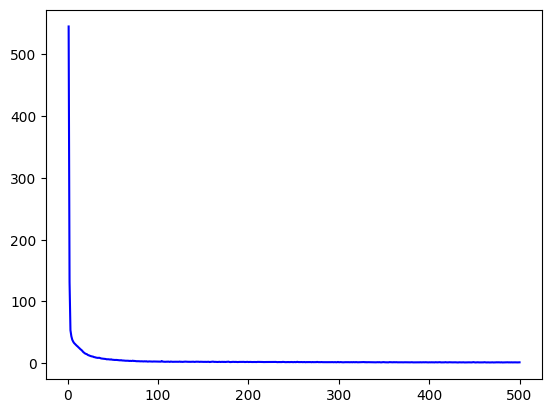

In [ ]:
#accuracy = history_ae.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history_ae.history['loss']
#val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
#plt.plot(epochs,accuracy,'bo',label = 'Training Accuracy')
plt.plot(epochs,loss,'b',label = 'Validation_loss')

In [ ]:
# now built a seprate model to get encoded values
# this is an encoder
model_encode = Model(input_layer,encoder)

In [ ]:
# Save The model
path = '/content/drive/MyDrive/datascience/SavedModel/encoder.h5'

In [ ]:
model_encode.save(path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# loading a model
#model_encoder = load_model(path)

In [ ]:
x_encode = model_encode.predict(x_valuess)

287/287 [==============================] - 1s 1ms/step


In [ ]:
x_train_en,x_test_en,y_train_en,y_test_en = train_test_split(x_encode,y_lbl)

In [ ]:
len(x_encode[0])

12

In [ ]:
mdl_thyro = mlp_model(len(x_encode[0]))


In [ ]:
mdl_thyro.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist_encode = mdl_thyro.fit(x_train_en,y_train_en,epochs=500)

Epoch 1/500
215/215 [==============================] - 2s 3ms/step - loss: 1.1828 - accuracy: 0.6912
Epoch 2/500
215/215 [==============================] - 1s 2ms/step - loss: 0.9068 - accuracy: 0.7678
Epoch 3/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8550 - accuracy: 0.7771
Epoch 4/500
215/215 [==============================] - 1s 2ms/step - loss: 0.8119 - accuracy: 0.7822
Epoch 5/500
215/215 [==============================] - 1s 3ms/step - loss: 0.7907 - accuracy: 0.7878
Epoch 6/500
215/215 [==============================] - 1s 4ms/step - loss: 0.7717 - accuracy: 0.7921
Epoch 7/500
215/215 [==============================] - 1s 4ms/step - loss: 0.7434 - accuracy: 0.7933
Epoch 8/500
215/215 [==============================] - 1s 4ms/step - loss: 0.7371 - accuracy: 0.7956
Epoch 9/500
215/215 [==============================] - 1s 4ms/step - loss: 0.7135 - accuracy: 0.8017
Epoch 10/500
215/215 [==============================] - 1s 4ms/step - loss: 0.7017 - accura

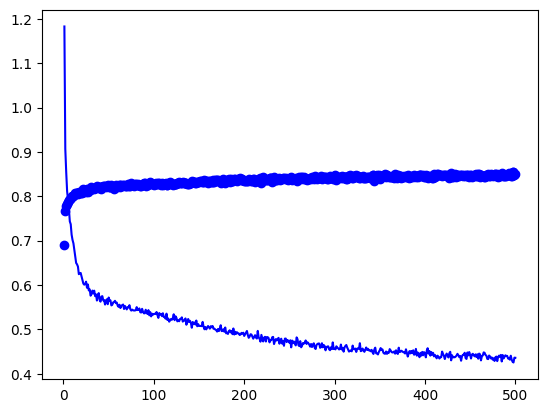

In [ ]:
accuracy = hist_encode.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = hist_encode.history['loss']
#val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,accuracy,'bo',label = 'Training Accuracy')
plt.plot(epochs,loss,'b',label = 'Validation_loss')

Implementation of PCA for Feature Extraction

In [ ]:
from sklearn.decomposition import PCA
# we have to create an instance of PCA
accuracy_list = []
for i in [14]:

  principal_comp = PCA(n_components=i)
  # transform the data into principal components
  x_pc = principal_comp.fit_transform(x_valuess)
  mdl_princpal = mlp_model(len(x_pc[0]))
  x_train_pc,x_test_pc,y_train_pc,y_test_pc = train_test_split(x_pc,y_lbl)
  mdl_princpal.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
  hist_pc = mdl_princpal.fit(x_train_pc,y_train_pc,epochs=500)
  accuracy = hist_pc.history['accuracy']
  accuracy_list.append(max(accuracy))

Epoch 1/500
215/215 [==============================] - 2s 2ms/step - loss: 1.3163 - accuracy: 0.7178
Epoch 2/500
215/215 [==============================] - 1s 2ms/step - loss: 0.9458 - accuracy: 0.7744
Epoch 3/500
215/215 [==============================] - 1s 2ms/step - loss: 0.8569 - accuracy: 0.7830
Epoch 4/500
215/215 [==============================] - 1s 2ms/step - loss: 0.8172 - accuracy: 0.7838
Epoch 5/500
215/215 [==============================] - 1s 3ms/step - loss: 0.7851 - accuracy: 0.7894
Epoch 6/500
215/215 [==============================] - 1s 3ms/step - loss: 0.7763 - accuracy: 0.7876
Epoch 7/500
215/215 [==============================] - 1s 3ms/step - loss: 0.7409 - accuracy: 0.7936
Epoch 8/500
215/215 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.7981
Epoch 9/500
215/215 [==============================] - 1s 3ms/step - loss: 0.6606 - accuracy: 0.7987
Epoch 10/500
215/215 [==============================] - 1s 2ms/step - loss: 0.6140 - accura

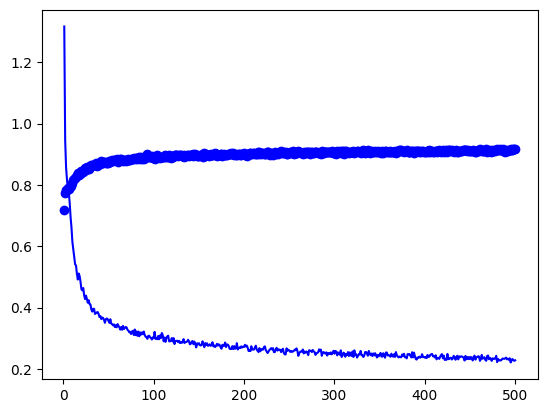

In [ ]:
accuracy_pca = hist_pc.history['accuracy']
#val_acc = history.history['val_accuracy']
loss_pca = hist_pc.history['loss']
#val_loss = history.history['val_loss']
epochs = range(1,len(loss_pca)+1)
plt.plot(epochs,accuracy_pca,'bo',label = 'Training Accuracy')
plt.plot(epochs,loss_pca,'b',label = 'Validation_loss')

In [ ]:
accuracy_list

[0.9167029857635498]

In [ ]:
# Decision tree classifier results
# building a Decison Tree clasiisifer for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# creating an istance of Decision tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train_pc,y_train_pc)



DecisionTreeClassifier()

In [ ]:
y_pred = dtc.predict(x_test_pc)

In [ ]:
print('mis classified samples %d' % (y_test_pc!= y_pred).sum())

mis classified samples 588


In [ ]:
len(y_test_pc)

2293

In [ ]:
print(accuracy_score(y_test_pc,y_pred))

0.8717836894897514


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,f1_score



In [ ]:
print(classification_report(y_test_pc,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        45
           1       0.79      0.77      0.78       134
           2       0.61      0.68      0.64       102
           3       0.65      0.77      0.71        93
           4       0.82      0.78      0.80        96
           5       0.33      0.43      0.38         7
           6       0.42      0.24      0.31        58
           7       0.93      0.94      0.93      1758

   micro avg       0.87      0.87      0.87      2293
   macro avg       0.63      0.62      0.62      2293
weighted avg       0.87      0.87      0.87      2293
 samples avg       0.87      0.87      0.87      2293



In [ ]:
# actual values to be feeded into classifier
#train_xx,test_xx,train_yy,test_yy
dtc_vanilla = DecisionTreeClassifier()
dtc_vanilla.fit(train_xx,train_yy)

DecisionTreeClassifier()

In [ ]:
y_pred_vanilla = dtc_vanilla.predict(test_xx)

In [ ]:
print(accuracy_score(test_yy,y_pred_vanilla))

0.920421511627907


Implementation of Support Vector Machines

In [ ]:
# the data we need for SVM are different and we need to need y values
# which were nor label binarize instead one hot encoded
onhe = OneHotEncoder()
y_svm = onhe.fit_transform(np.array(y).reshape(-1,1))

In [ ]:
train_x_svm,test_x_svm,train_y_svm,test_y_svm = train_test_split(x_valuess,y,test_size = 0.3)

In [ ]:
train_y_svm

3340    7.0
5249    2.0
4923    7.0
2664    7.0
8719    1.0
       ... 
5656    7.0
8285    1.0
4895    7.0
3297    3.0
5676    4.0
Name: target, Length: 6420, dtype: float64

In [ ]:
from sklearn.svm import SVC
# creating an instance of support vector classifer
rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(train_x_svm, train_y_svm)
poly =SVC(kernel='poly', degree=6, C=1).fit(train_x_svm, train_y_svm)

In [ ]:
poly_pred = poly.predict(test_x_svm)
rbf_pred = rbf.predict(test_x_svm)

In [ ]:
poly_accuracy = accuracy_score(test_y_svm, poly_pred)
poly_f1 = f1_score(test_y_svm, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  79.25
F1 (Polynomial Kernel):  72.24


In [ ]:
rbf_accuracy = accuracy_score(test_y_svm, rbf_pred)
rbf_f1 = f1_score(test_y_svm, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  76.42
F1 (RBF Kernel):  66.20


In [ ]:
a,b = 10, 20
print(a+b)

30


In [ ]:
print(c)

NameError: ignored

In [ ]:
a=10

In [ ]:
b = 20

In [ ]:
c = ab*

In [ ]:
d = 50

In [ ]:
type(d)